# Estudio de Mercado: Proyecto de Venta de Elotes 🌽

Este notebook presenta un análisis detallado de un estudio de mercado realizado para evaluar la viabilidad de un negocio de venta de elotes. Utilizando los datos recopilados a partir de una encuesta, hemos explorado diversos aspectos del interés y las preferencias del consumidor en torno a este producto tradicional.

## Objetivo del Proyecto

El objetivo principal de este estudio es identificar las oportunidades, desafíos y preferencias de los consumidores con respecto a la compra de elotes. Esto incluye factores como la frecuencia de consumo, los lugares de compra preferidos, los sabores y combinaciones más populares, y el rango de precios aceptables. Estos datos permitirán obtener una visión más clara sobre la demanda de elotes en el mercado y establecer una estrategia de negocio eficaz.

## Estructura del Análisis

A lo largo de este notebook, usaremos **Matplotlib** para visualizar los resultados de la encuesta. Las visualizaciones ayudarán a ilustrar tendencias clave y ofrecerán un resumen gráfico de las estadísticas más relevantes, facilitando la interpretación de los datos y la toma de decisiones. A continuación, se desglosan los pasos específicos del análisis:

1. **Descripción de los datos**: Presentación de las variables y dimensiones de la encuesta.
2. **Análisis de la frecuencia de consumo**: ¿Los encuestados tienen una preferencia por los elotes?
3. **Preferencias de compra**: Exploración de los lugares de compra preferidos.
4. **Gustos y preferencias**: Análisis de sabores y combinaciones más populares.
5. **Rango de precios**: Evaluación de los precios que los consumidores están dispuestos a pagar.

Al final de este análisis, se presentarán conclusiones y recomendaciones que podrán servir como base para la toma de decisiones en el desarrollo de este proyecto de venta de elotes.

## Iniciando el proyecto en python
Para iniciar el proyecto, se ha leído un archivo CSV utilizando la biblioteca pandas. El archivo CSV se encuentra en la ruta especificada por la variable fname, que tiene el valor 'p:\\python\\.venv\\Lib\\site-packages\\matplotlib\\mpl-data\\sample_data\\data\\maizteca.csv'.

El archivo CSV contiene datos recopilados a partir de una encuesta sobre el consumo de elotes. Los datos se han cargado en un DataFrame de pandas llamado maizteca. El DataFrame tiene las siguientes columnas: 'Marca temporal', 'sexo', 'edad', 'gusto elote', 'condimentos favoritos', 'precio', 'formato presentacion', 'intolerante lactosa' y 'grado de coccion'.

El DataFrame maizteca tiene un total de 60 filas y 9 columnas. Algunas columnas pueden contener valores nulos, como se indica en el resumen del DataFrame. Los tipos de datos de todas las columnas son objetos (cadenas de texto).

El objetivo de leer este archivo CSV es utilizar los datos recopilados en la encuesta para realizar un análisis detallado del estudio de mercado sobre la venta de elotes.

In [73]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cbook as cbook
import matplotlib.font_manager as fm

from matplotlib import colormaps

import numpy as np
import pandas as pd

# Set the custom font for the plot
font_dirs = ["assets/fonts/"]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

path = "data/maizteca.csv"

fname = cbook.get_sample_data(path, asfileobj=False)
maizteca = pd.read_csv(path)

# Convert the text data to numbers, and plot it
data = maizteca.to_numpy()

# Get the count of the persons
persons = data[:, 0]
persons = persons.__len__()

print(persons)

60


## Creamos la primera grafica en base a nuestros datos anteriores
Ahora, con ayuda de matplotlib, crearemos la primera grafica de barras usando las funciones de matplotlib

        Sexo  Número de personas
0   Femenino                  24
1  Masculino                  24
2      Otros                  12


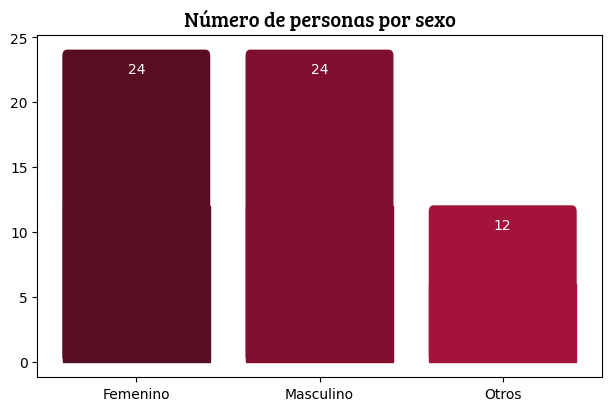

In [74]:
# Get the data.
sex_data = np.unique(
    np.array(
        list(
            map(lambda x: x if x in ["Masculino", "Femenino"] else "Otros", data[:, 1])
        )
    ),
    return_counts=True,
)

# Plot the data and print table.
print(pd.DataFrame({"Sexo": sex_data[0], "Número de personas": sex_data[1]}))

# Create the figure and the axes.
fig, ax = plt.subplots(figsize=(6, 4), constrained_layout=True)
colors = [
    "#590D22",
    "#800F2F",
    "#A4133C",
    "#C9184A",
    "#FF4D6D",
    "#FF758F",
    "#FF8FA3",
    "#FFB3C1",
    "#FFCCD5",
    "#FFF0F3",
]

# Remove the null values from the plotting data.
sex_bars_without_nans = [x if x is not None else 0 for x in sex_data[1]]
sex_bars = plt.bar(x=sex_data[0], height=sex_bars_without_nans, color=colors[0])

# Rounding bars patch
for i, bar in enumerate(sex_bars):
    # Add text annotation.
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() - 2,
        sex_bars_without_nans[i],
        ha="center",
        va="bottom",
        color="white",
    )

    # Make the bars rounded.
    if bar.get_height() > 0.2 * min(sex_bars_without_nans):
        rounded_top = mpatches.FancyBboxPatch(
            xy=bar.get_xy(),
            width=bar.get_width(),
            height=bar.get_height(),
            boxstyle="round,pad=0,rounding_size=0.02",
            color=colors[i],
            transform=ax.transData,
            mutation_scale=1.1,
            mutation_aspect=20,
        )
        square_bottom = mpatches.Rectangle(
            xy=bar.get_xy(),
            width=bar.get_width(),
            height=bar.get_height() / 2,
            transform=ax.transData,
            color=colors[i],
        )

    bar.remove()
    plt.gca().add_patch(rounded_top)
    plt.gca().add_patch(square_bottom)


# Add labels.
plt.title(
    "Número de personas por sexo", fontsize=15, fontweight="bold", fontname="Bree Serif"
)

plt.show()

### Explicación del código
Este código realiza un análisis de los datos de género (sexo) obtenidos en la encuesta y luego visualiza el número de personas por cada categoría de género (Masculino, Femenino, Otros) usando un gráfico de barras. A continuación, se explica cada bloque del código:

#### Paso 1: Obtener y Procesar los Datos de Género
```python
sex_data = np.unique(
    np.array(
        list(
            map(lambda x: x if x in ["Masculino", "Femenino"] else "Otros", data[:, 1])
        )
    ),
    return_counts=True,
)
```

1. **`data[:, 1]`**: Este comando selecciona todos los datos de la segunda columna del array `data`, asumiendo que esta columna contiene la información de género.

2. **`map(lambda x: x if x in ["Masculino", "Femenino"] else "Otros", data[:, 1])`**: Con esta línea, se utiliza una función `lambda` para recorrer cada valor de género. Si el valor es "Masculino" o "Femenino", se mantiene. Si es otro valor, se clasifica como "Otros".

3. **`list(...)` y `np.array(...)`**: La función `map` devuelve un objeto iterable, por lo que se convierte en una lista, y luego en un array de Numpy para poder aplicar operaciones adicionales.

4. **`np.unique(..., return_counts=True)`**: Esta función obtiene los valores únicos ("Masculino", "Femenino" y "Otros") y cuenta cuántas veces aparece cada valor en el array. `np.unique` devuelve dos arrays: el primero contiene los valores únicos y el segundo las cuentas de cada valor.

   **Resultado de `sex_data`**:
   `sex_data[0]` contiene las etiquetas de género ("Masculino", "Femenino", "Otros"), y `sex_data[1]` contiene el conteo de cada género.

#### Paso 2: Crear una Tabla y Graficar los Resultados
```python
print(pd.DataFrame({"Sexo": sex_data[0], "Número de personas": sex_data[1]}))
```

Este código crea una tabla usando `pandas.DataFrame` para mostrar los datos de género en un formato de tabla, que facilita la revisión de los datos. `sex_data[0]` proporciona los valores de "Sexo" y `sex_data[1]` da el "Número de personas".

#### Paso 3: Visualizar los Datos en un Gráfico de Barras
```python
plt.bar(sex_data[0], sex_data[1], color="blue")
```

- **`plt.bar(sex_data[0], sex_data[1], color="blue")`**: Aquí, se crea un gráfico de barras en el que `sex_data[0]` proporciona las etiquetas en el eje X (las categorías de sexo) y `sex_data[1]` el número de personas en el eje Y. El color de las barras se define como azul.

#### Paso 4: Añadir Etiquetas al Gráfico
```python
plt.xlabel("Sexo")
plt.ylabel("Número de personas")
plt.title("Número de personas por sexo")
```

Estas líneas añaden etiquetas al gráfico: "Sexo" en el eje X, "Número de personas" en el eje Y y un título general "Número de personas por sexo".

#### Paso 5: Mostrar el Gráfico
```python
plt.show()
```

Esta línea finaliza el código mostrando el gráfico en el notebook. 



## Edad
Basándonos en la misma base anterior, generaremos los valores de edad

  Rango de edad  Número de personas
0       51 - 65                   1
1           76+                   2
2        1 - 14                   3
3       36 - 50                   3
4       15 - 17                  12
5       18 - 25                  39


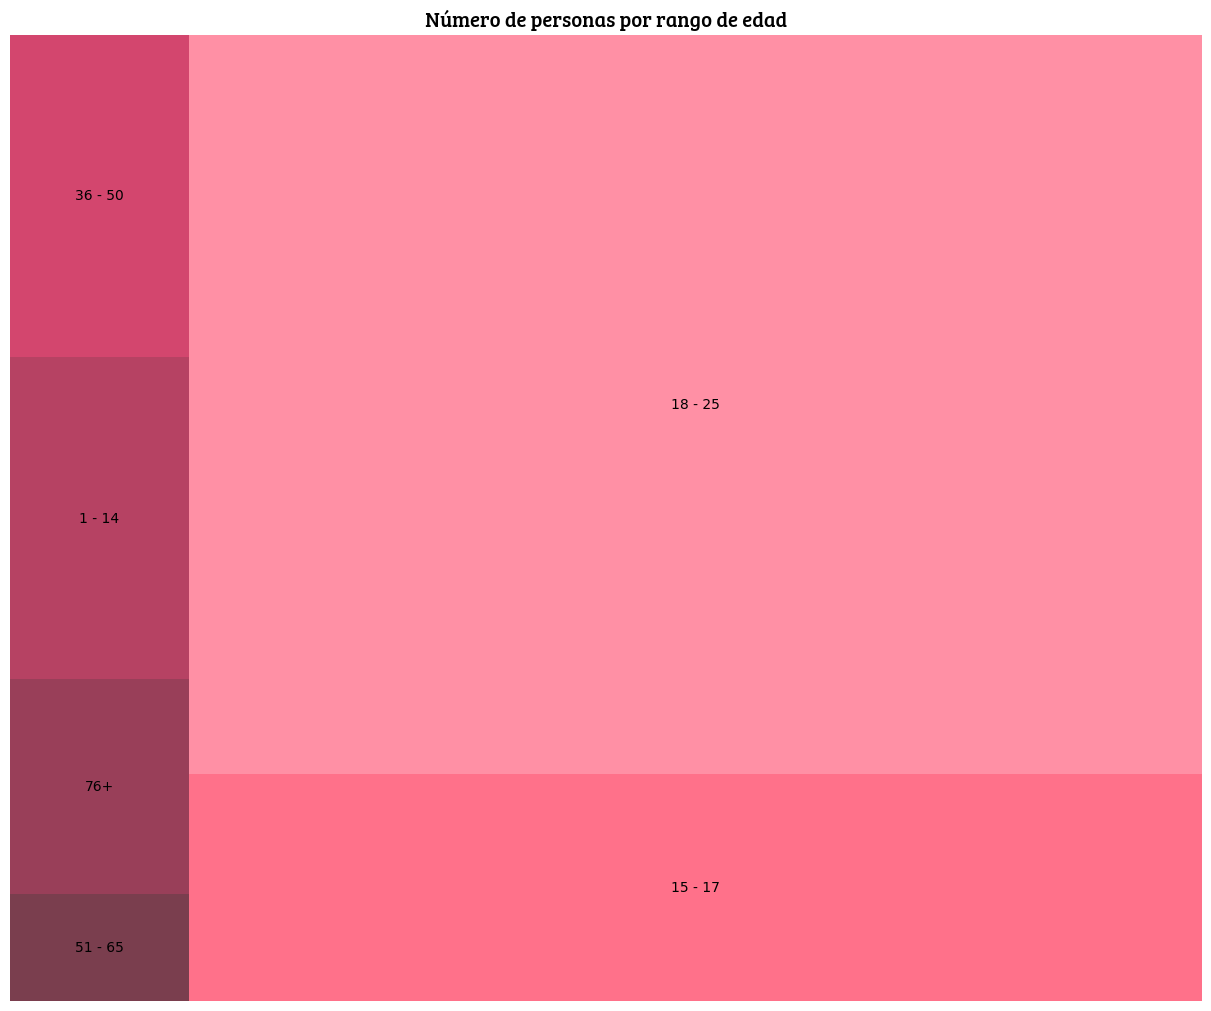

In [75]:
import squarify

# Get the data.
age_data = np.unique(np.array(list(map(lambda x: x, data[:, 2]))), return_counts=True)

# Sort the data.
age_data = (np.array(age_data[0])[np.argsort(age_data[1])], np.sort(age_data[1]))

# Plot the data and print table.
print(pd.DataFrame({"Rango de edad": age_data[0], "Número de personas": age_data[1]}))

# Draw the plot
colors = [
    "#590D22",
    "#800F2F",
    "#A4133C",
    "#C9184A",
    "#FF4D6D",
    "#FF758F",
    "#FF8FA3",
    "#FFB3C1",
    "#FFCCD5",
    "#FFF0F3",
]

# Create the square figure and the axes.
plt.figure(figsize=(12, 10), constrained_layout=True)
squarify.plot(
    sizes=age_data[1],
    label=age_data[0],
    color=colors,
    alpha=0.8,
)

plt.title(
    "Número de personas por rango de edad",
    fontsize=15,
    fontweight="bold",
    fontname="Bree Serif",
)
plt.axis("off")
plt.show()

## Gusto por el elote
Ahora el gusto por el elote

  Gusto por el elote  Número de personas
0                 No                   2
1   No lo he probado                   1
2                 Sí                  57


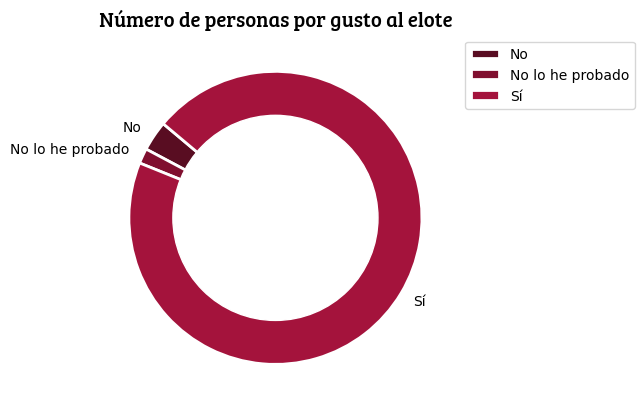

In [76]:
# Get the data.
like_data = np.unique(
    np.array(list(map(lambda x: x if x != "nan" else "No contestó", data[:, 3]))),
    return_counts=True,
)

# Plot the data and print table.
print(
    pd.DataFrame(
        {"Gusto por el elote": like_data[0], "Número de personas": like_data[1]}
    )
)

# Create the figure and the axes.
fig, ax = plt.subplots(figsize=(6, 4), constrained_layout=True)
colors = [
    "#590D22",
    "#800F2F",
    "#A4133C",
    "#C9184A",
    "#FF4D6D",
    "#FF758F",
    "#FF8FA3",
    "#FFB3C1",
    "#FFCCD5",
    "#FFF0F3",
]

# Create a donut plot.
plt.pie(
    like_data[1],
    colors=colors,
    startangle=140,
    labels=like_data[0],
    wedgeprops={"linewidth": 2, "edgecolor": "white"},
)

# add a circle at the center to transform it in a donut chart
my_circle = plt.Circle((0, 0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(my_circle)

# Add labels.
plt.title(
    "Número de personas por gusto al elote",
    fontsize=15,
    fontweight="bold",
    fontname="Bree Serif",
)

plt.legend(loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

## Condimentos favoritos
Ahora revisamos el/los condimento(s) favoritos elegidos por los encuestados.


       Condimentos  Número de personas
0   Chile en salsa                   7
1  Chile en aceite                  11
2            Papas                  15
3   Chile en polvo                  28
4            Limon                  36
5              Sal                  37
6            Crema                  38


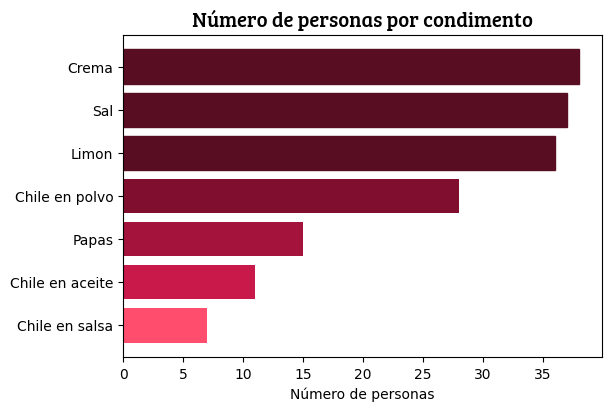

In [77]:
# Get the data
condiments_data = list(map(lambda x: x, data[:, 4]))

# Split the values in the array and count them.
condiments_data = list(map(lambda x: str(x).split(";"), condiments_data))
condiments_data = [item for sublist in condiments_data for item in sublist]

# Create the figure and the axes.
fig, ax = plt.subplots(figsize=(6, 4), constrained_layout=True)
colors = ["#FF4D6D", "#C9184A", "#A4133C", "#800F2F"]

# Remove all nans
condiments_data = list(filter(lambda x: x != "nan", condiments_data))

# Get the unique values and count them.
condiments_data = np.unique(np.array(condiments_data), return_counts=True)

# Sort the data by the number of people.
condiments_data = (
    condiments_data[0][np.argsort(condiments_data[1])],
    condiments_data[1][np.argsort(condiments_data[1])],
)

print(
    pd.DataFrame(
        {"Condimentos": condiments_data[0], "Número de personas": condiments_data[1]}
    )
)

# Plot the data.
plt.barh(condiments_data[0], condiments_data[1], color=colors)

# Put the colors of the 3 last bars different.
for i, bar in enumerate(plt.gca().patches):
    if i >= len(condiments_data[0]) - 3:
        bar.set_color("#590D22")


# Set the labels.
plt.title(
    "Número de personas por condimento",
    fontsize=15,
    fontweight="bold",
    fontname="Bree Serif",
)
plt.xlabel("Número de personas")

plt.show()

## Precio
Ahora, sacamos el precio promedio por el cuál las personas prefieren su elote

  Precio del elote  Número de personas
0             $25                    5
1             $30                   18
2             $35                   18
3             $40                   18


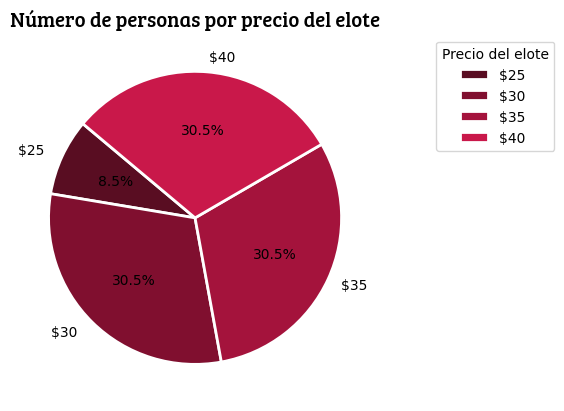

In [78]:
price_data = np.unique(np.array(list(map(lambda x: x, data[:, 5]))), return_counts=True)

# Remove all nans
price_data = (
    price_data[0][np.where(price_data[0] != "nan")],
    price_data[1][np.where(price_data[0] != "nan")],
)

# Sort the data by the number of people.
price_data = (
    price_data[0][np.argsort(price_data[1])],
    price_data[1][np.argsort(price_data[1])],
)

# Plot the data and print table.
print(
    pd.DataFrame(
        {"Precio del elote": price_data[0], "Número de personas": price_data[1]}
    )
)


# Create the figure and the axes.
fig, ax = plt.subplots(figsize=(6, 4), constrained_layout=True)
colors = [
    "#590D22",
    "#800F2F",
    "#A4133C",
    "#C9184A",
    "#FF4D6D",
    "#FF758F",
    "#FF8FA3",
    "#FFB3C1",
    "#FFCCD5",
    "#FFF0F3",
]

# Create a donut plot.
plt.pie(
    price_data[1],
    colors=colors,
    startangle=140,
    labels=price_data[0],
    wedgeprops={"linewidth": 2, "edgecolor": "white"},
    autopct="%1.1f%%",
)

plt.title(
    "Número de personas por precio del elote",
    fontsize=15,
    fontweight="bold",
    fontname="Bree Serif",
)
plt.legend(title="Precio del elote", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

## Formato de presentación
En este, sacamos el formato de presentación que prefieren los encuestados

  Formato del elote  Número de personas
0           En palo                  10
1           En vaso                  23
2        En bandeja                  25


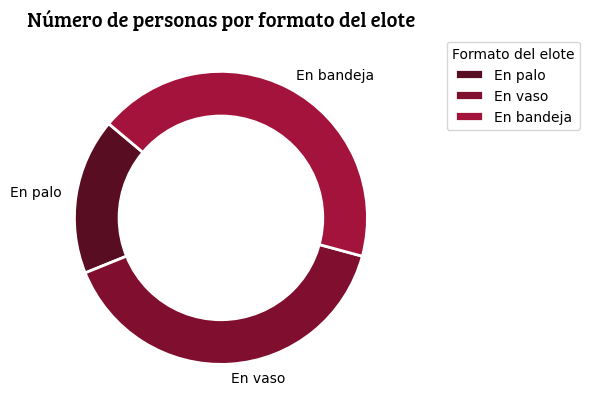

In [79]:
format_data = np.unique(
    np.array(list(map(lambda x: x, data[:, 6]))), return_counts=True
)

# Remove all nans
format_data = (
    format_data[0][np.where(format_data[0] != "nan")],
    format_data[1][np.where(format_data[0] != "nan")],
)

# Sort the data by the number of people.
format_data = (
    format_data[0][np.argsort(format_data[1])],
    format_data[1][np.argsort(format_data[1])],
)

# Plot the data and print table.
print(
    pd.DataFrame(
        {"Formato del elote": format_data[0], "Número de personas": format_data[1]}
    )
)

# Create the figure and the axes.
fig, ax = plt.subplots(figsize=(6, 4), constrained_layout=True)

# Create a donut plot.
plt.pie(
    format_data[1],
    colors=colors,
    startangle=140,
    labels=format_data[0],
    wedgeprops={"linewidth": 2, "edgecolor": "white"},
)

# add a circle at the center to transform it in a donut chart
my_circle = plt.Circle((0, 0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.title(
    "Número de personas por formato del elote",
    fontsize=15,
    fontweight="bold",
    fontname="Bree Serif",
)
plt.legend(title="Formato del elote", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

## Intolerancia a la lactosa
Sacamos las preferencias de lactosa a los usuarios

  Intolerante a la lactosa  Número de personas
0                 No lo sé                   2
1                       Sí                  11
2                       No                  45


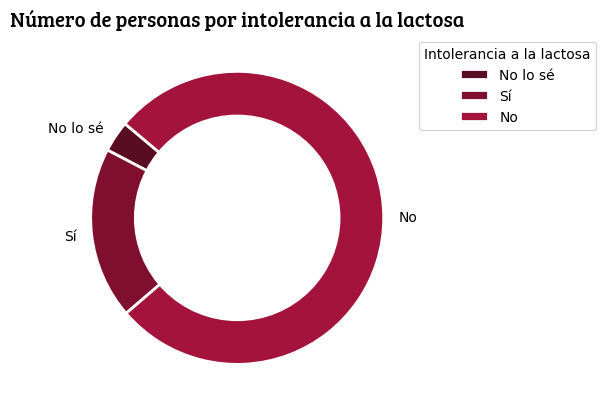

In [83]:
intolerant_lactose_data = np.unique(
    np.array(list(map(lambda x: x, data[:, 7]))), return_counts=True
)

# Remove all nans
intolerant_lactose_data = (
    intolerant_lactose_data[0][np.where(intolerant_lactose_data[0] != "nan")],
    intolerant_lactose_data[1][np.where(intolerant_lactose_data[0] != "nan")],
)

# Sort the data by the number of people.
intolerant_lactose_data = (
    intolerant_lactose_data[0][np.argsort(intolerant_lactose_data[1])],
    intolerant_lactose_data[1][np.argsort(intolerant_lactose_data[1])],
)

# Plot the data and print table.
print(
    pd.DataFrame(
        {
            "Intolerante a la lactosa": intolerant_lactose_data[0],
            "Número de personas": intolerant_lactose_data[1],
        }
    )
)

# Create the figure and the axes.
fig, ax = plt.subplots(figsize=(6, 4), constrained_layout=True)
colors = [
    "#590D22",
    "#800F2F",
    "#A4133C",
    "#C9184A",
    "#FF4D6D",
    "#FF758F",
    "#FF8FA3",
    "#FFB3C1",
    "#FFCCD5",
    "#FFF0F3",
]

# Create a donut plot.
plt.pie(
    intolerant_lactose_data[1],
    colors=colors,
    startangle=140,
    labels=intolerant_lactose_data[0],
    wedgeprops={"linewidth": 2, "edgecolor": "white"},
)

# add a circle at the center to transform it in a donut chart
my_circle = plt.Circle((0, 0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.title(
    "Número de personas por intolerancia a la lactosa",
    fontsize=15,
    fontweight="bold",
    fontname="Bree Serif",
)
plt.legend(
    title="Intolerancia a la lactosa", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.show()

## Grado de cocción
Ahora, en base a otra preferencia personal del usuario

  Forma de cocinar el elote  Número de personas
0                    Maduro                   5
1     Cualquiera de los dos                  20
2                    Tierno                  34


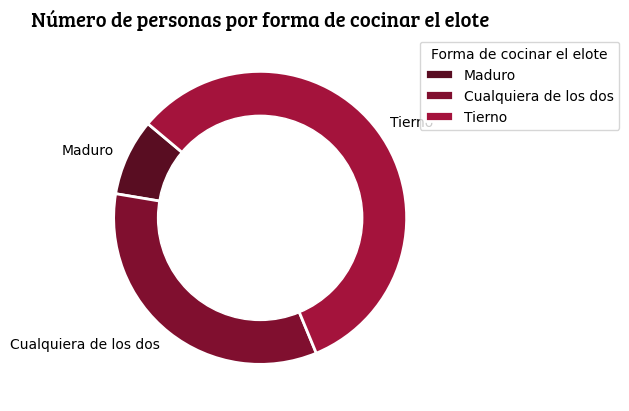

In [84]:
cooking_data = np.unique(
    np.array(list(map(lambda x: x, data[:, 8]))), return_counts=True
)

# Remove all nans
cooking_data = (
    cooking_data[0][np.where(cooking_data[0] != "nan")],
    cooking_data[1][np.where(cooking_data[0] != "nan")],
)

# Sort the data by the number of people.
cooking_data = (
    cooking_data[0][np.argsort(cooking_data[1])],
    cooking_data[1][np.argsort(cooking_data[1])],
)

# Plot the data and print table.
print(
    pd.DataFrame(
        {
            "Forma de cocinar el elote": cooking_data[0],
            "Número de personas": cooking_data[1],
        }
    )
)

# Create the figure and the axes.
fig, ax = plt.subplots(figsize=(6, 4), constrained_layout=True)

# Create a donut plot.
plt.pie(
    cooking_data[1],
    colors=colors,
    startangle=140,
    labels=cooking_data[0],
    wedgeprops={"linewidth": 2, "edgecolor": "white"},
)

# add a circle at the center to transform it in a donut chart
my_circle = plt.Circle((0, 0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.title(
    "Número de personas por forma de cocinar el elote",
    fontsize=15,
    fontweight="bold",
    fontname="Bree Serif",
)
plt.legend(
    title="Forma de cocinar el elote", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1)
)
plt.show()